In [80]:
import tensorboard as tb
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from packaging import version
from scipy import stats
from scipy.interpolate import Rbf


major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.4.0


In [57]:
# # for cartpole
# ENV_NAMES = ['Random Noise', 'Random Action', 'Sign Flipping', 'exp1']
# experiment_ids = ["tKqRKDX5TDe6ul26NYl4VQ", "iObYJ5NWSqqG1GsrZVddHA", "dwrilEMzQAKWcZQ20g9EOQ", 'N6T4MvXPQRCEvamXGNS7Mg']


# # for lunarlander - to run
# ENV_NAMES = ['Random Noise', 'Random Action', 'Sign Flipping', 'exp1']
# experiment_ids = ["tKqRKDX5TDe6ul26NYl4VQ", "iObYJ5NWSqqG1GsrZVddHA", "dwrilEMzQAKWcZQ20g9EOQ", 'N6T4MvXPQRCEvamXGNS7Mg']


# for half-cheetah
ENV_NAMES = ['Random Noise', 'Random Action', 'Sign Flipping', 'exp1']
experiment_ids = ["LwWJaUQbR6iAVkKfO3TY8A", "IOogeXQlRUm9iOoZcemUVg", "ZoBb1ummQ7GFYuB2jhDriw", 'ehAu5EPfRMeEQgvt1FBMHQ']



experiments = []
dfs = []
for experiment_id in experiment_ids:
    experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
    experiments.append(experiment)
    dfs.append(experiment.get_scalars())
    


In [58]:
# for half-cheetah
ENV_NAMES = ['Random Noise', 'Random Action', 'Sign Flipping', 'exp1']
experiment_ids2 = ["qrk034QhQpCGya0iXGy8FA"]

experiments2 = []
dfs2 = []
for experiment_id in experiment_ids2:
    experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
    experiments2.append(experiment)
    dfs2.append(experiment.get_scalars())
    


# Train or Validate?

In [59]:
dfws = []
for idx_, experiment in enumerate(experiments):
    dfw = experiment.get_scalars(pivot=False)
    dfw = dfw[dfw.tag.str.startswith("validate/total")]
#     if idx_ == 2:
#         dfw = dfw[dfw.run.str.contains("W10B3-SF_20210126T1350")]# filter the discarded runs for cartpole only!
    dfws.append(dfw)
    
for idx_, experiment in enumerate(experiments2):
    dfw = experiment.get_scalars(pivot=False)
    dfw = dfw[dfw.tag.str.startswith("validate/total")]
#     if idx_ == 2:
#         dfw = dfw[dfw.run.str.contains("W10B3-SF_20210126T1350")]# filter the discarded runs for cartpole only!
    dfws.append(dfw)
    

In [60]:
len(dfws)
ENV_NAMES = ['Random Noise', 'Random Action', 'Sign Flipping', 'exp1']

In [61]:
dfws[0] = pd.concat([dfws[0], dfws[4][dfws[4].run.str.contains('Ju_W10B3_RN')]])
dfws[1] = pd.concat([dfws[1], dfws[4][dfws[4].run.str.contains('Ju_W10B3_RA')]])
dfws[2] = pd.concat([dfws[2], dfws[4][dfws[4].run.str.contains('Ju_W10B3_SF')]])

In [62]:
dfws = dfws[:4]

In [65]:
dfws[3].run.unique()

array(['HalfCheetah-v2/worker10_byzantine0_detect-attack/Exp1_HalfCheetah2_Ours_W10_20210120T201248',
       'HalfCheetah-v2/worker1_byzantine0_detect-attack/Exp1_HalfCheetah2_Ours_W1_20210120T201241',
       'HalfCheetah-v2/worker1_byzantine0_detect-attack/Exp1_HalfCheetah2_SVRG_W1_20210120T201238',
       'HalfCheetah-v2/worker1_byzantine0_detect-attack/Exp1_HalfCheetah2_VPG_W1_20210120T201240',
       'HalfCheetah-v2/worker3_byzantine0_detect-attack/Exp1_HalfCheetah2_Ours_W3_20210121T044012'],
      dtype=object)

# Plot configurations


In [66]:
################# CartPole, LunarLander, HalfCheetah
# max_trajectories_ls = [int(5e3), int(5e3), int(5e3)]
max_trajectories_ls = [int(1e4), int(1e4), int(1e4)]
max_runs = 10
interval = 0.90

# Plot!

['FedPG-BR (K=1)', 'FedPG-BR', 'FedPG-BR-v0']
['FedPG-BR (K=1)', 'FedPG-BR', 'FedPG-BR-v0']
['FedPG-BR (K=1)', 'FedPG-BR', 'FedPG-BR-v0']


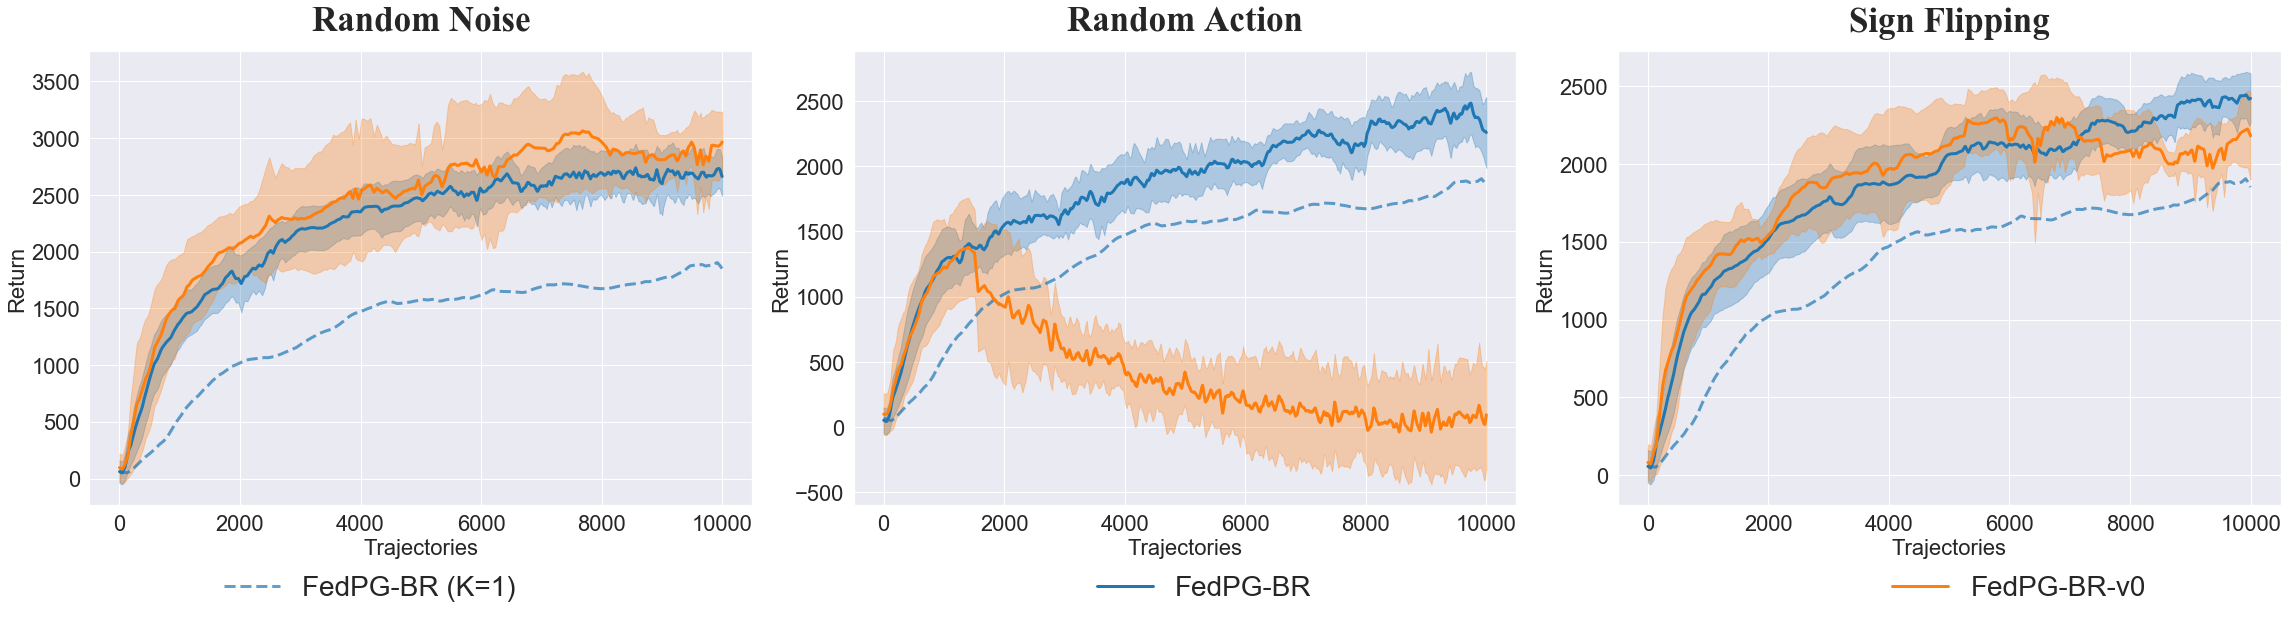

In [79]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(32,8))

colors = [u'#1f77b4', u'#ff7f0e', u'#d62728', u'#d62728', u'#9467bd', u'#8c564b']
# colors =  ['#9467bd', '#d62728', '#e89216'][::-1]
# [u'#1f77b4', u'#ff7f0e', u'#9467bd', u'#2ca02c', u'#d62728', u'#8c564b']

for plot_id in range(3):
    
    dfw = dfws[plot_id]
    max_trajectories = max_trajectories_ls[plot_id]
    
    runs = dfw["run"].unique()
    runs_ordered = []
    runs_ordered_labels = []
    
    
    for i in range(10):
        for name in runs:
            if i == 0 and 'VPG' in name:
                pass
#                 runs_ordered.append(name)
#                 runs_ordered_labels.append('GPOMDP (K=10 B=3)')
#                 runs_ordered.append('VPG')
#                 runs_ordered_labels.append('GPOMDP (K=1)')
            elif i == 1 and 'SVRG' in name:
                pass
#                 runs_ordered.append(name)
#                 runs_ordered_labels.append('SVRPG (K=10 B=3)')
#                 runs_ordered.append('SVRG')
#                 runs_ordered_labels.append('SVRPG (K=1)')
            elif i == 2 and 'Ours' in name and 'W10' in name:
                runs_ordered.append('Ours')
                runs_ordered_labels.append('FedPG-BR (K=1)')
                runs_ordered.append(name)
                runs_ordered_labels.append('FedPG-BR')
            elif i == 3 and 'Ju' in name and 'W10' in name:
                runs_ordered.append(name)
                runs_ordered_labels.append('FedPG-BR-v0')
#                 runs_ordered.append('Ours')
#                 runs_ordered_labels.append('FedPG-BR (K=1)')
                
#             elif i == 3 and 'Ju' in name:
#                 runs_ordered.append(name)
#                 runs_ordered_labels.append('FedPG-BR* (K=10 B=3)')
#                 runs_ordered.append('Ours')
#                 runs_ordered_labels.append('FedPG-BR (K=1)')

    print(runs_ordered_labels)
    for idx, run_name in enumerate(runs_ordered):
        if '(' in runs_ordered_labels[idx]:
            
            dfw_ = dfws[-1]
            cur_dfw = dfw_[dfw_.run.str.contains(f'{run_name}') & dfw_.run.str.contains(f'W1_')]
            lines = []
            for run_id in range(max_runs):
                steps = cur_dfw[cur_dfw.tag.str.endswith(f'{run_id}')]['step'].to_numpy()
                values = cur_dfw[cur_dfw.tag.str.endswith(f'{run_id}')]['value'].to_numpy()
                lines.append(Rbf(steps, values, function = 'linear')(np.arange(max_trajectories)))
            
            mean = np.mean(lines, axis=0)
            axes[plot_id].plot(mean, label=(f"{runs_ordered_labels[idx]}"), linewidth=3., linestyle = 'dashed', alpha = 0.7, color = colors[idx // 2])
            
            
        else:
            cur_dfw = dfw[dfw.run.str.endswith(f'{run_name}')]
            lines = []
            for run_id in cur_dfw.tag.unique():
#                 print(cur_dfw.tag.unique())
                steps = cur_dfw[cur_dfw.tag.str.contains(f'{run_id}')]['step'].to_numpy()
                if len(steps) < 100:
                    continue
                values = cur_dfw[cur_dfw.tag.str.contains(f'{run_id}')]['value'].to_numpy()
#                 print(steps, values)
                lines.append(Rbf(steps, values, function = 'linear')(np.arange(max_trajectories)))
            
            mean = np.mean(lines, axis=0)
            l, h = stats.norm.interval(interval, loc=np.mean(lines, axis = 0), scale=stats.sem(lines, axis = 0))
            
            axes[plot_id].plot(mean, label=(f"{runs_ordered_labels[idx]}"), linewidth=3, color = colors[idx // 2])
            axes[plot_id].fill_between(range(int(max_trajectories)), l, h, alpha = 0.3, color = colors[idx // 2])    

            
        axes[plot_id].set_title(ENV_NAMES[plot_id], fontsize=35, 
                                pad=20,
                                fontname='Times New Roman')
        axes[plot_id].tick_params(labelsize=22)
        axes[plot_id].set_xlabel("Trajectories", fontsize=22)
        axes[plot_id].set_ylabel("Return", fontsize=22)
            
            
# ax.set_yticklabels(y_ticks, rotation=0, fontsize=8)
# plt.legend(loc='bottom', 
#            ncol=1, 
#            handlelength=1,
#            mode="expand", 
#            bbox_to_anchor=(1.05, 0, 1,0), borderaxespad=0, prop={'size': 13})
plt.tight_layout(pad=1)
# plt.rcParams["font.family"] = "Times New Roman"

# Shrink current axis's height by 10% on the bottom

length_ = (axes[2].get_position().x1 - axes[0].get_position().x0) / (axes[0].get_position().x1 - axes[0].get_position().x0)

# Put a legend below current axis
plt_lgd = plt.legend(loc='upper left', bbox_to_anchor=(length_ * 0.05, -0.1, length_ * 0.9, 0), bbox_transform=axes[0].transAxes,
         mode = "expand", fancybox=False, shadow=False, ncol=3, fontsize = 28, frameon=False)

plt.savefig('./Appendix_Halfcheetah.pdf', format='svg', dpi=600,
            bbox_extra_artists=(plt_lgd,), bbox_inches='tight')
plt.show()